#CNN Image Classifier - Cats🐱 vs Dogs🐶

In this project, we will build a Convolutional Neural Network that will learn to classify images of cats and dogs.

**Convolutional Neural Networks (CNNs) :-**

CNNs are deep learning models suited for analyzing visual imagery. They are heavily influenced by how we - humans, see the surrounding world. 

CNN processes images using matrixes of weights called filters (features) that detect specific attributes such as vertical edges, horizontal edges, etc. Moreover, as the image progresses through each layer, the filters are able to recognize more complex attributes. Ultimate goal of the CNN is to detect what is going on in the scene.

**Image Classification - is it a cat or a dog?**

The ultimate goal of this project is to create a system that can detect cats and dogs. While our goal is very specific (cats vs dogs), ImageClassifier can detect anything that is tangible with an adequate dataset.

We will use Keras to implement the model. You can read more about Keras at [keras.io](https://keras.io/).

**Dataset:** [Dogs vs Cats](https://drive.google.com/file/d/1zNRPnFEc4m5Esrrfp4j49mJwLk85zY39/view?usp=sharing)

**Description:** Binary classification. Classify dogs and cats.

**Training:** 20,000 images (10,000 per class)

**Validation:** 5,000 images (2,500 per class)

**Testing:** 12,500 unlabeled images

##1. Loading Data and Packages

Let's start by importing the modules we'll require fot this project.

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
from livelossplot import PlotLossesKeras

Using TensorFlow backend.


In [0]:
# Data Preprocessing
training_data_dir = "data/training"         # 10 000 * 2
validation_data_dir = "data/validation"     # 2 500 * 2
test_data_dir = "data/test"                 # 12 500

In [0]:
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
TEST_FILE = "test_file.txt"
MODEL_FILE = "model.h5"

In [0]:
# Hyperparams
IMAGE_SIZE = 200
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
BATCH_SIZE = 32
TEST_SIZE = 30

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

##2. Building CNN Model

In [5]:
# Model preparation
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape, padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
    
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


##3. Data Augmentation

In [0]:
# Data augmentation
training_data_generator = ImageDataGenerator(
                          rescale=1./255,
                          shear_range=0.1,
                          zoom_range=0.1,
                          horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

##4. Data Preparation

In [7]:
# Data preparation
training_generator = training_data_generator.flow_from_directory(
                      training_data_dir,
                      target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
                      batch_size=BATCH_SIZE,
                      class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
                        validation_data_dir,
                        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
                        batch_size=BATCH_SIZE,
                        class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
                  test_data_dir,
                  target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
                  batch_size=1,
                  class_mode="binary", 
                  shuffle=False)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


##5. Model Training

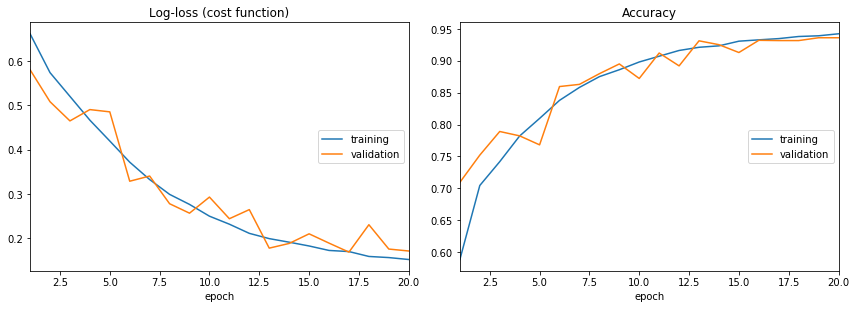

Log-loss (cost function):
training   (min:    0.152, max:    0.662, cur:    0.152)
validation (min:    0.168, max:    0.581, cur:    0.171)

Accuracy:
training   (min:    0.588, max:    0.942, cur:    0.942)
validation (min:    0.709, max:    0.936, cur:    0.936)


In [11]:
# Training
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")], 
    verbose=1)
model.save_weights(MODEL_FILE)

##6. Prediction

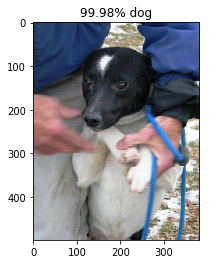

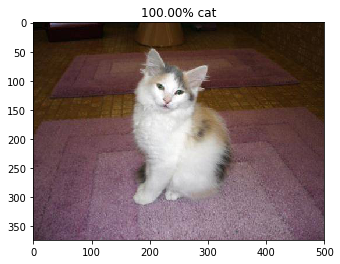

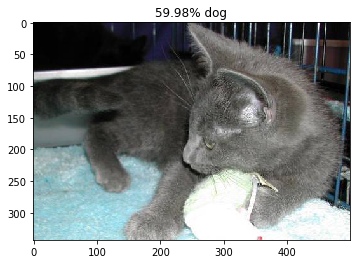

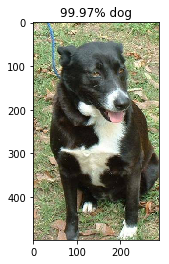

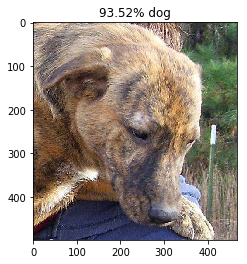

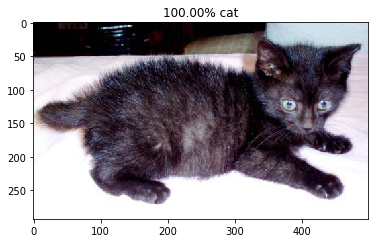

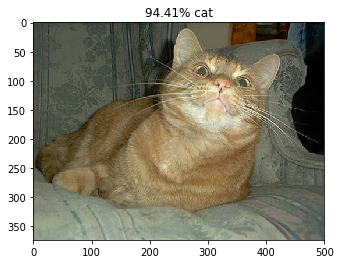

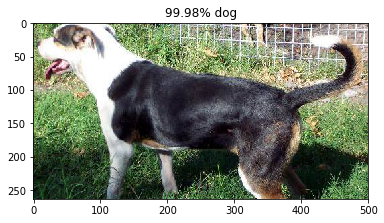

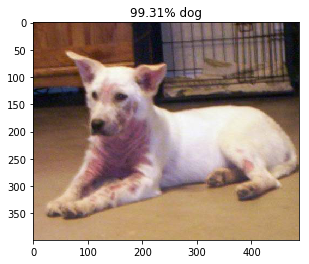

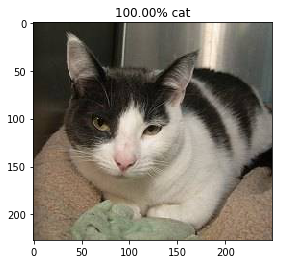

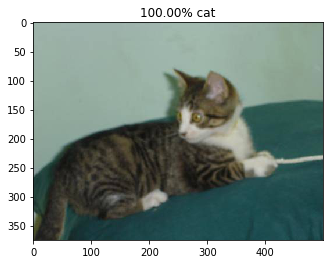

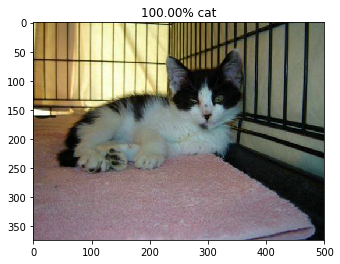

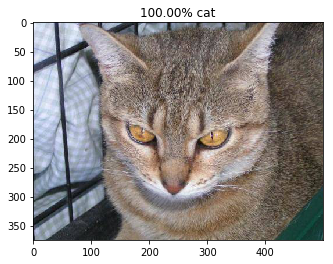

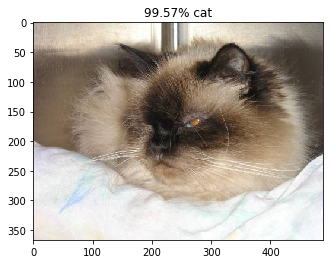

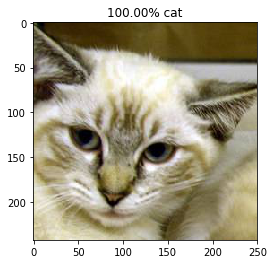

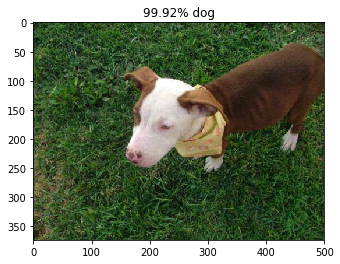

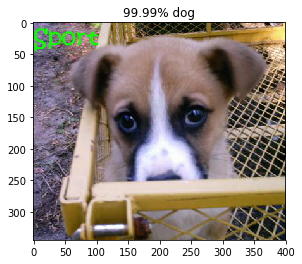

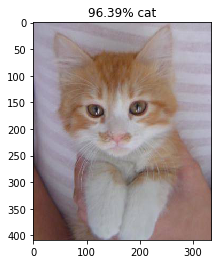

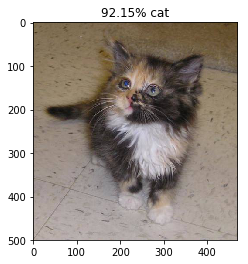

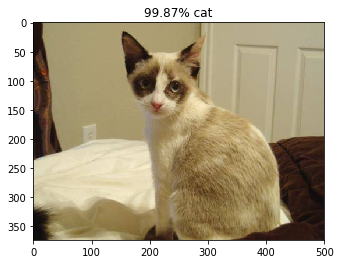

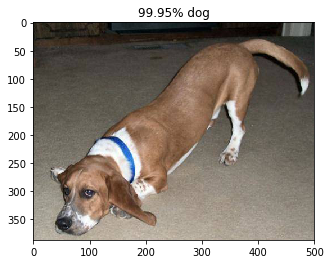

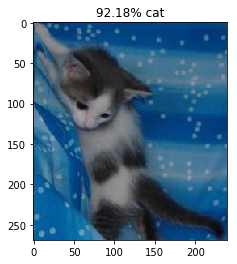

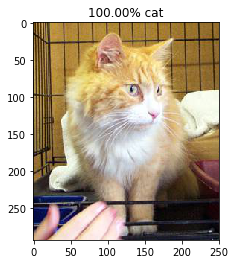

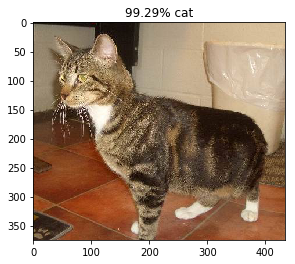

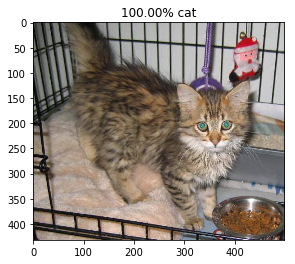

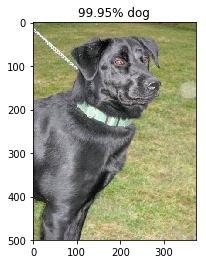

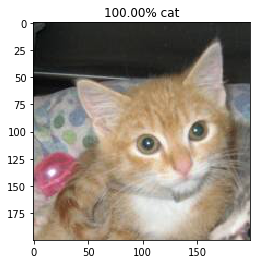

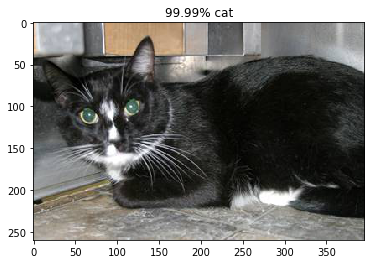

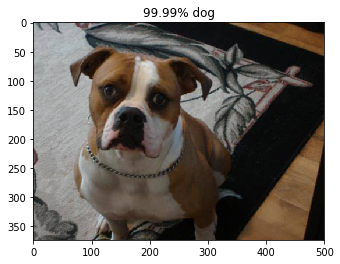

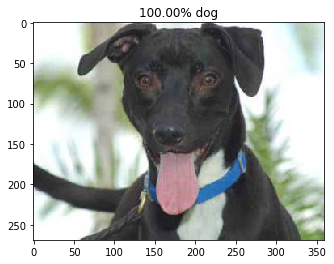

In [12]:
# Testing
open(TEST_FILE,"w")
probabilities = model.predict_generator(test_generator, TEST_SIZE)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    with open(TEST_FILE,"a") as fh:
        fh.write(str(probability[0]) + " for: " + image_path + "\n")
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    plt.show()

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 128)       73856     
__________